In [1]:
import pickle

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
model_name = "resnet"
train_name = "IN"
test_name = "IN"

classes = [
    
    'airplane', 'bear', 'bicycle', 'bird', 
    'boat', 'bottle', 'car', 'cat', 
    'chair', 'clock', 'dog', 'elephant',
    'keyboard', 'knife', 'oven', 'truck'
]


load_path = f'./neighbor_dict/{test_name}_to_{model_name}-{train_name}_neighbors_dict.pkl'
with open(load_path, mode='rb') as f:
    v_dicts = pickle.load(f)
    
load_path = f'./prediction_dict/{test_name}_to_{model_name}-{train_name}_prediction_dict.pkl'
with open(load_path, mode='rb') as f:
    p_dicts = pickle.load(f)

In [3]:
c = classes[0]
i = 0

neighbours = v_dicts[c][i]
preds      = p_dicts[c][i]

In [4]:
neighbours

array([ 0.,  0.,  0., ...,  1., 13., 14.])

In [5]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
c_num = 0
neighbour_space = np.where(neighbours == c_num, 1, 0)

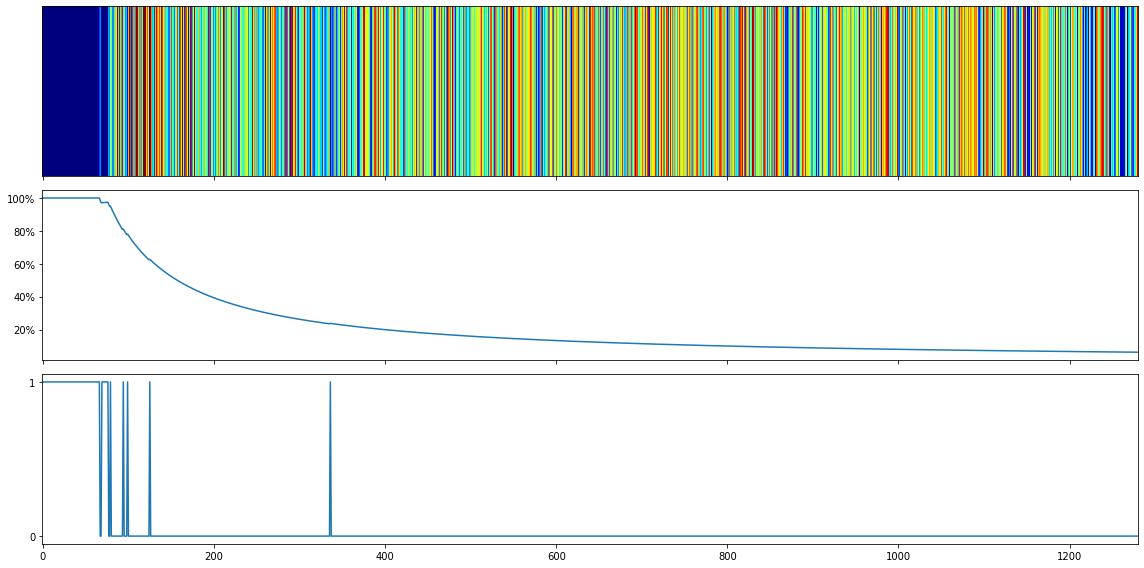

In [7]:
fig = plt.figure(1, figsize=(16, 8))
ax1,ax2, ax3 = fig.subplots(nrows=3, sharex=True)

ax1.imshow(neighbours[np.newaxis,:], cmap="jet", aspect="auto")
ax1.set_yticks([])

ax2.plot(np.cumsum(neighbour_space)/ (np.arange(neighbour_space.shape[0])+1) )
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

ax3.plot(neighbour_space)
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## Metrics

In [8]:
dist = np.where(neighbour_space==1)[0]
dist.shape

(80,)

In [9]:
count = len(dist)
count

80

In [10]:
max = dist.max()
max

336

In [11]:
min = dist.min()
min

0

In [12]:
mean = np.sum(dist)/ dist.shape[0]
mean

44.05

In [13]:
var = np.sum((dist-mean)**2)/ (dist.shape[0]-1)
var

1750.3772151898734

In [14]:
std = np.sqrt(var)
std

41.837509667640035

In [15]:
md = np.median(dist)
md

39.5

In [16]:
acc = np.count_nonzero(np.where(preds == c_num, 1, 0)) / len(preds)
acc

1.0